# COURSEWORK

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = yf.download("EBAY", start="2020-10-01", end="2021-11-01")  #downloading ebay stock from yahoo finance

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head() #first five rows of the data downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,52.980000,53.619999,51.509998,52.099998,51.365768,9083900
2020-10-01,52.369999,52.860001,52.000000,52.380001,51.641823,6659600
2020-10-02,51.610001,52.430000,51.189999,51.680000,50.951683,5456700
2020-10-05,51.939999,52.110001,51.150002,51.770000,51.040417,4954700
2020-10-06,51.910000,51.910000,49.490002,49.660000,48.960155,8824800


In [6]:
data.tail() #last five rows of the data downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,80.589996,81.059998,79.900002,80.570000,80.364433,6299600
2021-10-26,80.970001,80.980003,78.400002,78.500000,78.299713,6145700
2021-10-27,78.250000,78.500000,77.290001,77.660004,77.461861,7896500
2021-10-28,74.029999,74.480003,70.550003,72.410004,72.225258,17831800
2021-10-29,72.070000,76.980003,72.070000,76.720001,76.524261,16693800


In [7]:
S = data['Adj Close'][-1]
print('Ebay spot price is', round(S,2)) #ebay stock price as at 1st of november

Ebay spot price is 76.52


In [8]:
data[['Adj Close']].head()  #amended closing price to reflect possible corporate actions


,Adj Close
Date,
2020-09-30,51.365768
2020-10-01,51.641823
2020-10-02,50.951683
2020-10-05,51.040417
2020-10-06,48.960155


In [15]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%')

#caliberating daily volatily and annualizing it for the first six months

The first six months volatility is 37.1 %


In [17]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')

#caliberating daily volatily and annualizing it for the last six months

The last six months volatility is 34.33 %


In [9]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) #calculating daily volatility for the whole stock

In [10]:
vol = np.sqrt(252) * log_return.std()             #annualizing the daily volatility
print('Ebay annualised volatility is', round(vol*100,2), '%')

Ebay annualised volatility is 35.51 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

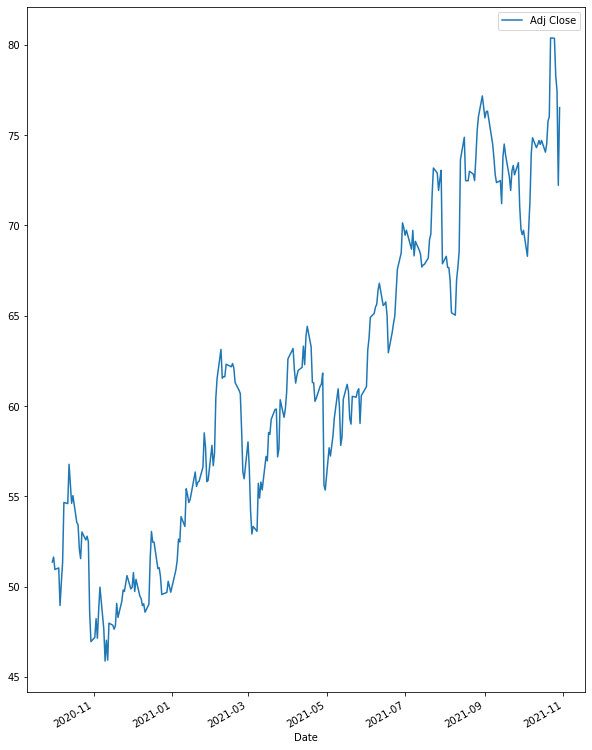

In [11]:
data[['Adj Close']].plot(figsize=(10, 14), subplots=True) #stock price movement

In [12]:
data.describe().round(2) #description of the stock prices downloaded

,Open,High,Low,Close,Adj Close,Volume
count,274.00,274.00,274.00,274.00,274.00,274.00
mean,61.83,62.71,61.07,61.92,61.45,7536748.91
std,8.62,8.67,8.62,8.67,8.82,3613216.02
min,46.90,47.64,45.36,46.54,45.88,2718500.00
25%,54.50,55.84,53.95,54.77,54.28,5376225.00
50%,61.24,62.13,60.74,61.40,60.92,6541850.00
75%,68.97,70.13,68.58,69.01,68.67,8934175.00
max,80.97,81.19,79.90,80.59,80.38,31082000.00


In [13]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,-0.0116,-0.0143,0.0095,0.0054,0.0054,-0.3104
2020-10-02,-0.0146,-0.0082,-0.0157,-0.0135,-0.0135,-0.1992
2020-10-05,0.0064,-0.0061,-0.0008,0.0017,0.0017,-0.0965
2020-10-06,-0.0006,-0.0038,-0.0330,-0.0416,-0.0416,0.5772


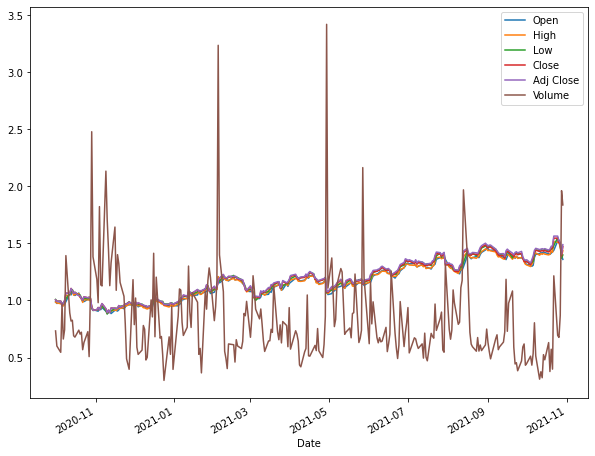

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 8));

# BINOMIAL TREE

In [18]:
#option pricing model

In [20]:
S0 = 76.52            # spot  price
K = 80.0               # strike price
T = 1.0                 # time to maturity 
r = 0.0134                 # 10 years risk free rate accessed on 3rd of December
sig = 0.3551             #stock volatily
N = 3                  # number of time steps  
payoff = "put"          # payoff 

In [21]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u 

In [22]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [23]:
S

array([[ 76.52      ,  93.93182237, 115.30563583, 141.54297572],
       [  0.        ,  62.33574791,  76.52      ,  93.93182237],
       [  0.        ,   0.        ,  50.78078238,  62.33574791],
       [  0.        ,   0.        ,   0.        ,  41.3677215 ]])

In [24]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p                     #uptrend

0.45976616206258525

In [25]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
P = 1.0 - q           # risk neutral down probability
q                     #downtrend

0.5402338379374148

In [26]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 17.66425209],
       [ 0.        ,  0.        ,  0.        , 38.6322785 ]])

In [27]:
  #European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[13.02615138,  5.10950846,  0.        ,  0.        ],
       [ 0.        , 19.87155402,  9.50029713,  0.        ],
       [ 0.        ,  0.        , 28.86268114, 17.66425209],
       [ 0.        ,  0.        ,  0.        , 38.6322785 ]])

In [28]:
print('European put option using Binomial tree is', str( V[0,0])) #option price

European put option using Binomial tree is 13.026151378384807


# MONTECARLO SIMULATION

In [29]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [30]:
S0 = 76.52            # spot  price
K = 80.0               # strike price
T = 1.0                 # time to maturity 
r = 0.0134                 # 10 years risk free rate accessed on 3rd of December
sigma = 0.3551             #stock volatily
payoff = "put"          # payoff 

In [31]:
S = mcs_simulation_np(10000)

In [32]:
S = np.transpose(S)
S

array([[ 76.52      ,  76.78788581,  76.91621276, ..., 104.79112339,
        104.77852486, 104.47339886],
       [ 76.52      ,  76.44961485,  76.71074798, ...,  74.17804666,
         74.21938779,  73.67718847],
       [ 76.52      ,  76.78830892,  76.48942672, ..., 121.87388209,
        121.30440528, 120.92475247],
       ...,
       [ 76.52      ,  76.47941243,  76.38244324, ..., 194.39088459,
        195.06090235, 195.08609805],
       [ 76.52      ,  76.61793932,  76.82857973, ...,  78.30799034,
         78.47244032,  78.66582836],
       [ 76.52      ,  76.35236231,  76.43113567, ...,  65.62002954,
         66.14239093,  65.69878237]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end of October values')

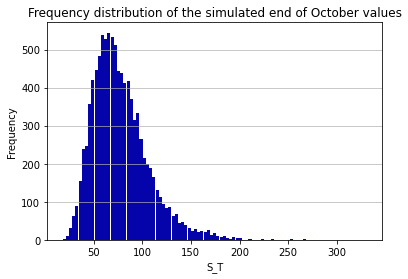

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=1.0, rwidth=0.95)

plt.grid(axis='y', alpha=0.85)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end of October values')

In [34]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put option for Montecarlo simulation is', str(p))

European put option for Montecarlo simulation is 12.425775829293316


# GREEKS

# DELTA     


In [ ]:
#sensitivity of the value of an option to a change in the price of the underlying asset.

In [99]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [100]:
S = np.linspace(30, 110, 31) # line space for spot price 
T = np.linspace(0.5, 2, 31)  #line space for time to maturity
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 80.0, T[i],0.0134,0.0099,0.3551,'put')

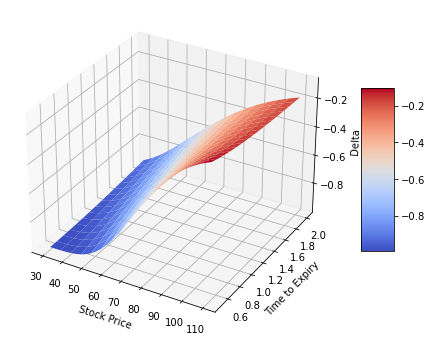

In [101]:
fig = plt.figure(figsize=(10, 6))  #3D graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

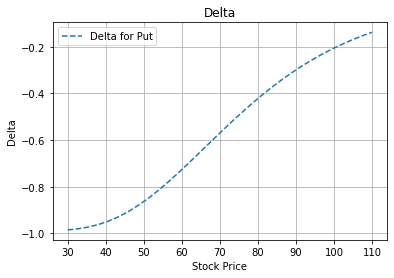

In [38]:
fig = plt.figure()                #2D graph
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [42]:
delta(76.52,80.0,1,0.0134,0.0099,0.3551,'put')

-0.47053571028874297

# GAMMA

In [ ]:
#sensitivity of delta to a change in the underlying asset 

In [43]:
def gamma(S, K, T, r, q, vol, payoff): #defining gamma
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [52]:
S = np.linspace(30, 110, 31)   # line space for spot price   
T = np.linspace(0.5, 2, 31)    # line space for time to maturity
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 80.0, T[i],0.0134,0.0099,0.3551,'put')

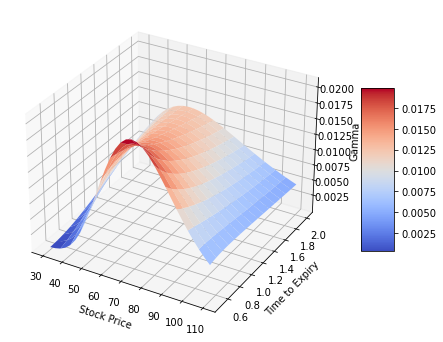

In [53]:
fig = plt.figure(figsize=(10, 6))   #3D graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [56]:
S = np.linspace(30,110,31)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 80.0, 1, 0.0134, 0.0099,0.3551, 'put')

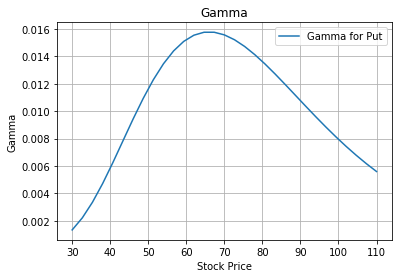

In [57]:
fig = plt.figure()           #2D graph
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [58]:
gamma(76.52,80.0,1,0.0134,0.0099,0.3551,'put') #value of gamma

0.014458585929951218

# SPEED

In [ ]:
# sensitivity of the gamma as regards to changes in the stock price.

In [59]:
def speed(S, K, T, r, q, vol, payoff): #defining speed
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [60]:
S = np.linspace(30, 110, 31) #line spacing for strike price
T = np.linspace(0.5, 2, 31)  #line spacing for time to maturity
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 80.0, T[i],0.0134,0.0099,0.3551,'put')

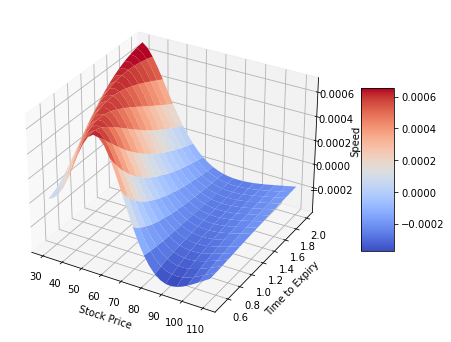

In [61]:
fig = plt.figure(figsize=(10, 6)) #3D graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [63]:
S = np.linspace(30,110,31)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 80.0, 1, 0.0134, 0.0099,0.3551, 'put')

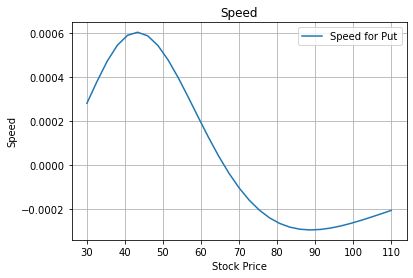

In [64]:
fig = plt.figure()      #2D graph
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [65]:
speed(76.52,80.0,1,0.0134,0.0099,0.3551,'put') #Value of speed

-0.00022280679601561167

# THETA

In [ ]:
#how much the option price will change when the time to maturity changes

In [66]:
def theta(S, K, T, r, q, vol, payoff): #defining theta
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [67]:
S = np.linspace(30, 110, 31)
T = np.linspace(0.5, 2, 31)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 80.0, T[i],0.0134,0.0099,0.3551,'put')

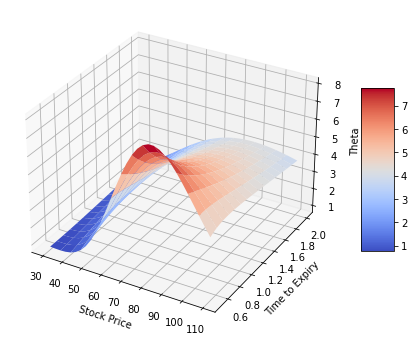

In [68]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [75]:
T = np.linspace(0.5,2,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(76.52, 80.0, T[i], 0.134, 0.0099 , 0.25, 'put')

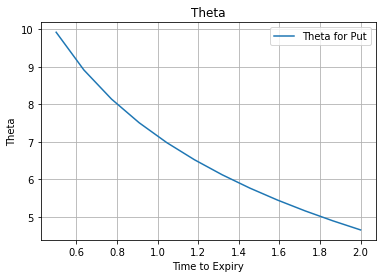

In [76]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [77]:
theta(76.52,80.0,1,0.0134,0.0099,0.3551,'put') #value of theta

5.650606579364103

# RHO

In [ ]:
#sensitivity of the underlying asset to a change in the risk-free rate 

In [79]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [80]:
S = np.linspace(30, 110, 31)
T = np.linspace(0.5, 2, 31)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 80.0, T[i],0.0134,0.0099,0.3551,'put')

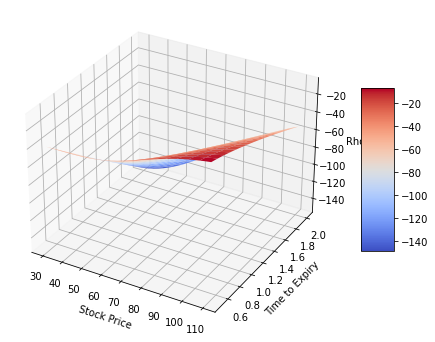

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [87]:
r = np.linspace(0,1.5,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(76.52, 80.0, 1, r[i], 0.0099, 0.3551, 'put')

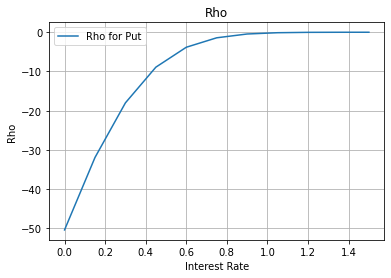

In [89]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [96]:
rho(76.52,80.0,1,0.0134,0.0099,0.3551,'put') #value of rho

-48.56212457830079